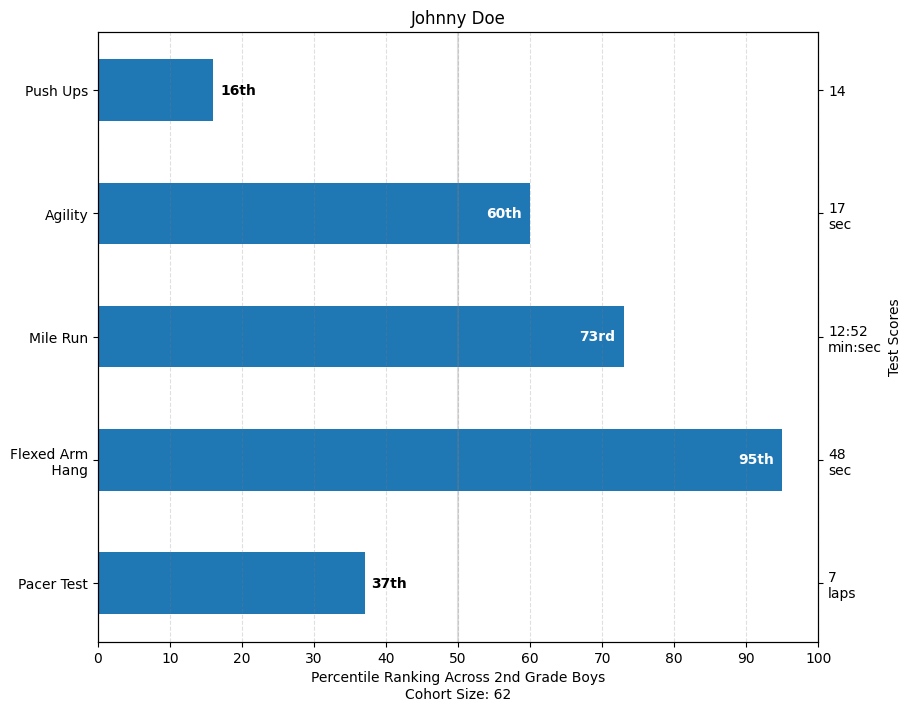

In [1]:
from collections import namedtuple
import numpy as np
import matplotlib.pyplot as plt


Student = namedtuple('Student', ['name', 'grade', 'gender'])
Score = namedtuple('Score', ['value', 'unit', 'percentile'])


def to_ordinal(num):
    """Convert an integer to an ordinal string, e.g. 2 -> '2nd'."""
    suffixes = {str(i): v
                for i, v in enumerate(['th', 'st', 'nd', 'rd', 'th',
                                       'th', 'th', 'th', 'th', 'th'])}
    v = str(num)
    # special case early teens
    if v in {'11', '12', '13'}:
        return v + 'th'
    return v + suffixes[v[-1]]


def format_score(score):
    """
    Create score labels for the right y-axis as the test name followed by the
    measurement unit (if any), split over two lines.
    """
    return f'{score.value}\n{score.unit}' if score.unit else str(score.value)


def plot_student_results(student, scores_by_test, cohort_size):
    fig, ax1 = plt.subplots(figsize=(9, 7), constrained_layout=True)
    fig.canvas.manager.set_window_title('Eldorado K-8 Fitness Chart')

    ax1.set_title(student.name)
    ax1.set_xlabel(
        'Percentile Ranking Across {grade} Grade {gender}s\n'
        'Cohort Size: {cohort_size}'.format(
            grade=to_ordinal(student.grade),
            gender=student.gender.title(),
            cohort_size=cohort_size))

    test_names = list(scores_by_test.keys())
    percentiles = [score.percentile for score in scores_by_test.values()]

    rects = ax1.barh(test_names, percentiles, align='center', height=0.5)
    # Partition the percentile values to be able to draw large numbers in
    # white within the bar, and small numbers in black outside the bar.
    large_percentiles = [to_ordinal(p) if p > 40 else '' for p in percentiles]
    small_percentiles = [to_ordinal(p) if p <= 40 else '' for p in percentiles]
    ax1.bar_label(rects, small_percentiles,
                  padding=5, color='black', fontweight='bold')
    ax1.bar_label(rects, large_percentiles,
                  padding=-32, color='white', fontweight='bold')

    ax1.set_xlim([0, 100])
    ax1.set_xticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
    ax1.xaxis.grid(True, linestyle='--', which='major',
                   color='grey', alpha=.25)
    ax1.axvline(50, color='grey', alpha=0.25)  # median position

    # Set the right-hand Y-axis ticks and labels
    ax2 = ax1.twinx()
    # Set equal limits on both yaxis so that the ticks line up
    ax2.set_ylim(ax1.get_ylim())
    # Set the tick locations and labels
    ax2.set_yticks(
        np.arange(len(scores_by_test)),
        labels=[format_score(score) for score in scores_by_test.values()])

    ax2.set_ylabel('Test Scores')


student = Student(name='Johnny Doe', grade=2, gender='Boy')
scores_by_test = {
    'Pacer Test': Score(7, 'laps', percentile=37),
    'Flexed Arm\n Hang': Score(48, 'sec', percentile=95),
    'Mile Run': Score('12:52', 'min:sec', percentile=73),
    'Agility': Score(17, 'sec', percentile=60),
    'Push Ups': Score(14, '', percentile=16),
}

plot_student_results(student, scores_by_test, cohort_size=62)
plt.show()